In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts'))
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'time_of_emergene_drafts', 'src'))
import my_stats

In [2]:
import matplotlib.pyplot as plt

 - Matplotlib created a temporary cache directory at /jobfs/143966123.gadi-pbs/matplotlib-e28qnb78 because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from dask import delayed, compute

In [4]:
from dask.distributed import Client, wait
# client.close()  # Close existing client
client = Client(n_workers=104, threads_per_worker=1, memory_limit=None)
client

 - State start
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/scheduler-zftq9kg1', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-rh1gqnef', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-njjpgtoy', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-h9spe_yw', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-dwvo0ba2', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-f4oj90hh', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-2w46o1l5', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-5yf29fku', purging
 - Found stale lock file and directory '/jobfs/143966123.gadi-pbs/dask-scratch-space/worker-ur

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 104
Total threads: 104,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34191,Workers: 104
Dashboard: /proxy/8787/status,Total threads: 104
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:40205,Total threads: 1
Dashboard: /proxy/41883/status,Memory: 0 B
Nanny: tcp://127.0.0.1:34513,


 - full garbage collection released 34.95 MiB from 135748 reference cycles (threshold: 9.54 MiB)


In [5]:
xr.set_options(display_expand_attrs=False)

# ACCESS-ESM1-5

## Process data to zarr

In [3]:
path = '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical'\
'/r10i1p1f1/day/tas/gn/latest/'
# 'tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_18500101-18991231.nc'

In [4]:
daily_ds = xr.open_mfdataset(path +'*.nc',)['tas']

Matplotlib created a temporary cache directory at /jobfs/143966123.gadi-pbs/matplotlib-80fbg4pi because the default path (/home/563/ab2313/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
daily_ds = daily_ds.chunk({'time':-1, 'lat':145//5, 'lon':192//16})

In [6]:
daily_ds

<xarray.DataArray 'tas' (time: 60265, lat: 145, lon: 192)> Size: 7GB
dask.array<rechunk-merge, shape=(60265, 145, 192), dtype=float32, chunksize=(60265, 29, 12), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 482kB 1850-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T05:28:26Z altered by CMOR: Treated scalar dime...

In [7]:
daily_ds = daily_ds.persist()
wait(daily_ds);

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 10.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [8]:
daily_ds

<xarray.DataArray 'tas' (time: 60265, lat: 145, lon: 192)> Size: 7GB
dask.array<rechunk-merge, shape=(60265, 145, 192), dtype=float32, chunksize=(60265, 29, 12), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 482kB 1850-01-01T12:00:00 ... 2014-12-31T1...
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T05:28:26Z altered by CMOR: Treated scalar dime...

In [9]:
daily_ds.to_zarr('/g/data/w40/ab2313/time_of_emergence/access_tas_daily_v2.zarr', mode='w')

## Testing

In [6]:
daily_ds = xr.open_dataset('/g/data/w40/ab2313/time_of_emergence/access_tas_daily_v2.zarr', engine='zarr')

In [7]:
daily_ds = daily_ds.chunk({'time':-1, 'lat':145//5, 'lon':192//16}).tas

In [8]:
daily_ds = daily_ds.persist()
wait(daily_ds);

In [9]:
daily_ds

<xarray.DataArray 'tas' (time: 60265, lat: 145, lon: 192)> Size: 7GB
dask.array<xarray-tas, shape=(60265, 145, 192), dtype=float32, chunksize=(60265, 29, 12), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 482kB 1850-01-01T12:00:00 ... 2014-12-31T1...
Attributes: (7)

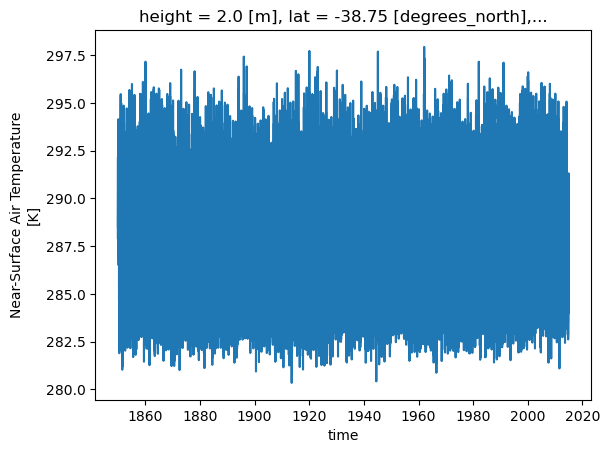

In [10]:
daily_ds.sel(lat=-39, lon=145, method='nearest').plot()

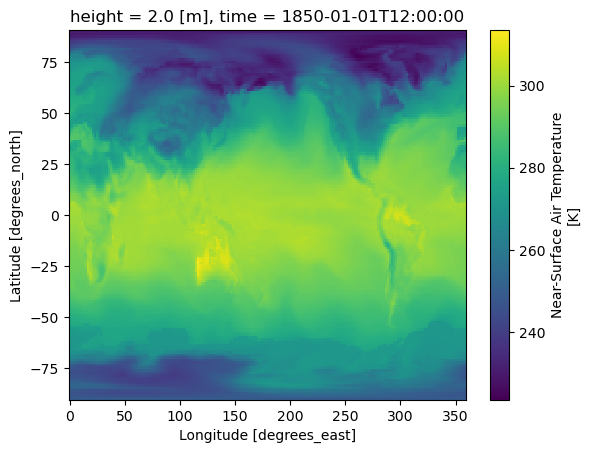

In [11]:
daily_ds.isel(time=0).plot()

In [44]:
arr = daily_ds.sel(lat=10, lon=20, method='nearest').sel(time=slice('1880', '2024')).compute()

In [45]:
doy_climatology = arr.sel(time=slice('1880', '1910')).groupby('time.dayofyear').mean()

In [46]:
arr_doy = arr.sel(time=arr.time.dt.dayofyear==5)

In [47]:
arr_doy_lowess = my_stats.apply_lowess(arr_doy)
arr_doy_mean = arr_doy.rolling(time=21, center=True).mean()

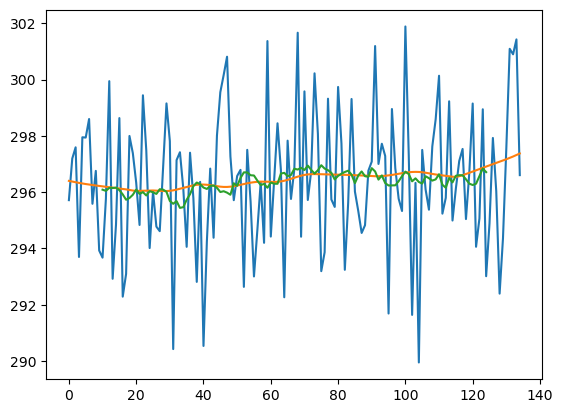

In [48]:
plt.plot(arr_doy)
plt.plot(arr_doy_lowess)
plt.plot(arr_doy_mean)

In [49]:
arr_yearly = arr.resample(time='YE').mean()

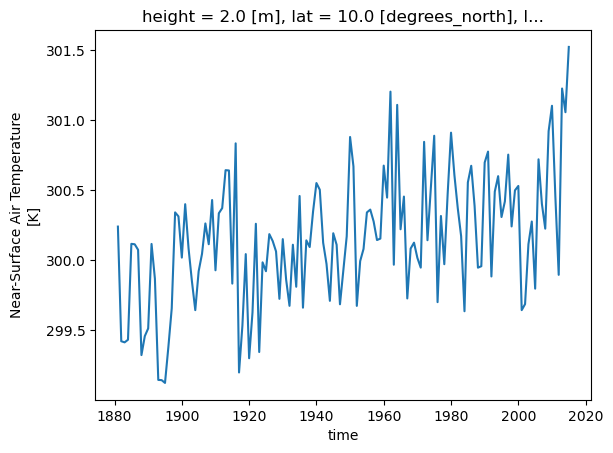

In [50]:
arr_yearly.plot()

In [51]:
unique_dayofyear = np.unique(arr.time.dt.dayofyear)
unique_dayofyear.shape

(366,)

In [52]:
def calculate_lowess_dayofyear(ds, doy):
    ds_doy = ds.sel(time=ds.time.dt.dayofyear == doy)

    # Apply LOWESS smoothing
    lowess_vals = my_stats.apply_lowess(ds_doy.values)

    # Create new DataArray with same structure and metadata
    da_doy_lowess = xr.zeros_like(ds_doy)
    da_doy_lowess.data = lowess_vals  # assign LOWESS-smoothed values directly

    # Add dayofyear dimension
    da_doy_lowess = da_doy_lowess.expand_dims(dayofyear=[doy])

    # Replace datetime with just year
    da_doy_lowess['time'] = ds_doy.time.dt.year.values
    da_doy_lowess = da_doy_lowess.rename({'time': 'year'})

    return da_doy_lowess

In [53]:
def calculate_rolling_dayofyear(da, doy):
    ds_doy = ds.sel(time=ds.time.dt.dayofyear == doy)
    ds_doy_rolling = ds_doy.rolling(time=21, center=True).mean()
    ds_doy_rolling = ds_doy_rolling.expand_dims(dayofyear=[doy])
    ds_doy_rolling['time'] = ds_doy_rolling.time.dt.year.values
    ds_doy_rolling = ds_doy_rolling.rename({'time': 'year'})

    return ds_doy_rolling

In [62]:
def create_doy_series(ds, doy):
    ds_doy = ds.sel(time=ds.time.dt.dayofyear == doy)
    ds_doy = ds_doy.expand_dims(dayofyear=[doy])
    ds_doy['time'] = ds_doy.time.dt.year.values
    ds_doy = ds_doy.rename({'time': 'year'})
    return ds_doy

In [112]:
def create_mon_series(ds, mon):
    ds_mon = ds.sel(time=ds.time.dt.month == mon).groupby('time.year').mean()
    ds_mon = ds_mon.expand_dims(month=[mon])
    # ds_mon['time'] = ds_mon.time.dt.year.values
    # ds_mon = ds_mon.rename({'time': 'year'})
    return ds_mon

In [143]:
def create_season_series(ds, season):
    # Select season (e.g. 'DJF', 'MAM', etc.)
    ds_season = ds.sel(time=ds.time.dt.season == season)
    
    # Group by year and take the seasonal mean
    ds_season = ds_season.groupby('time.year').mean()

    # Add 'season' as a new dimension
    ds_season = ds_season.expand_dims(season=[season])

    return ds_season

In [162]:
arr_annual = arr.resample(time='YE').mean().compute()
arr_annual['time'] = arr_annual.time.dt.year.values
arr_annual = arr_annual.rename({'time':'year'})

In [164]:
climatology_ds = arr_annual.sel(year=slice(1880, 1910)).mean(dim='year')

In [165]:
anom_ds = arr_annual - climatology_ds

In [175]:
anom_fitted_ds = xr.zeros_like(anom_ds)
anom_fitted_ds += my_stats.apply_lowess(anom_ds)

In [176]:
noise_ds = (anom_ds-anom_fitted_ds).sel(year=slice(1880, 1910)).std(dim='year')

In [177]:
sn_ds = anom_fitted_ds/noise_ds

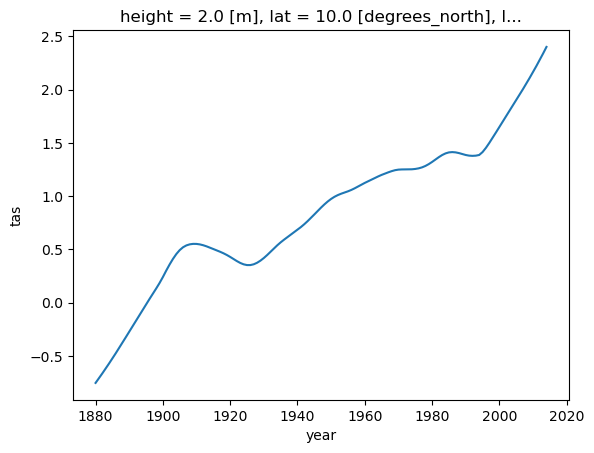

In [179]:
sn_ds.plot()

In [144]:
create_season_series_delayed = delayed(create_season_series)
delayed_tasks = [create_season_series_delayed(arr, i) for i in ['DJF', 'MAM', 'JJA', 'SON']]
season_list = compute(*delayed_tasks)

In [147]:
season_climatology_ds = season_ds.sel(year=slice(1880, 1910)).mean(dim='year')

In [148]:
season_anom_ds = season_ds - season_climatology_ds

In [149]:
season_fitted_ds = xr.apply_ufunc(
    my_stats.apply_lowess,
    season_anom_ds,
    input_core_dims=[['year']],
    output_core_dims=[['year']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float]  # important when Dask is used
).compute()

In [150]:
season_noise_ds = (season_ds-season_fitted_ds).sel(year=slice(1880, 1910)).std(dim='year')

In [151]:
season_sn_ds = season_fitted_ds/season_noise_ds

In [126]:
create_mon_series_delayed = delayed(create_mon_series)
delayed_tasks = [create_mon_series_delayed(arr, i) for i in range(1, 13)]
month_list = compute(*delayed_tasks)

In [127]:
month_ds = xr.concat(month_list, dim='month')

In [128]:
month_climatology_ds = month_ds.sel(year=slice(1880, 1910)).mean(dim='year')

In [129]:
month_anom_ds = month_ds - month_climatology_ds

In [130]:
month_fitted_ds = xr.apply_ufunc(
    my_stats.apply_lowess,
    month_anom_ds,
    input_core_dims=[['year']],
    output_core_dims=[['year']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float]  # important when Dask is used
).compute()

In [131]:
month_noise_ds = (month_ds-month_fitted_ds).sel(year=slice(1880, 1910)).std(dim='year')

In [132]:
month_sn_ds = month_fitted_ds/month_noise_ds

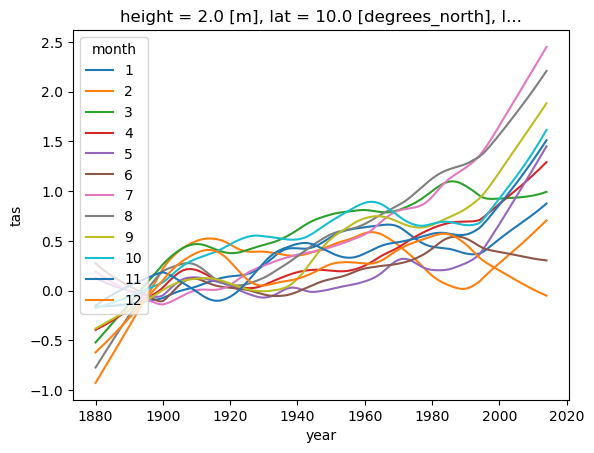

In [133]:
month_sn_ds.plot(hue='month');

In [63]:
create_doy_series_delayed = delayed(create_doy_series)
delayed_tasks = [create_doy_series_delayed(arr, i) for i in range(1, 366)]
dayofyear_list = compute(*delayed_tasks)

In [64]:
doy_ds = xr.concat(dayofyear_list, dim='dayofyear')

In [67]:
doy_climatology_ds = doy_ds.sel(year=slice(1880, 1910)).mean(dim='year')

In [68]:
doy_anom_ds = doy_ds - doy_climatology_ds

In [121]:
doy_fitted_ds = xr.apply_ufunc(
    my_stats.apply_lowess,
    doy_anom_ds,
    input_core_dims=[['year']],
    output_core_dims=[['year']],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float]  # important when Dask is used
).compute()

In [87]:
doy_noise_ds = (doy_ds-doy_fitted_ds).sel(year=slice(1880, 1910)).std(dim='year')

In [88]:
doy_sn_ds = doy_fitted_ds/doy_noise_ds

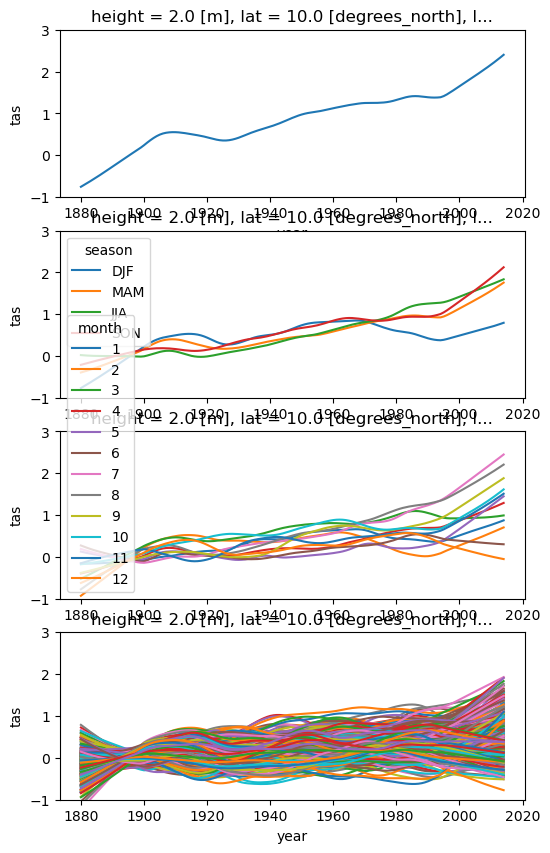

In [183]:
fig = plt.figure(figsize=(6, 10))
axes = [fig.add_subplot(4, 1, i+1) for i in range(4)]

sn_ds.plot(ax=axes[0])
season_sn_ds.plot(hue='season', ax=axes[1]);
month_sn_ds.plot(hue='month', ax=axes[2]);
doy_sn_ds.plot(hue='dayofyear', ax=axes[3], add_legend=False);

for ax in axes:
    ax.set_ylim(-1, 3)

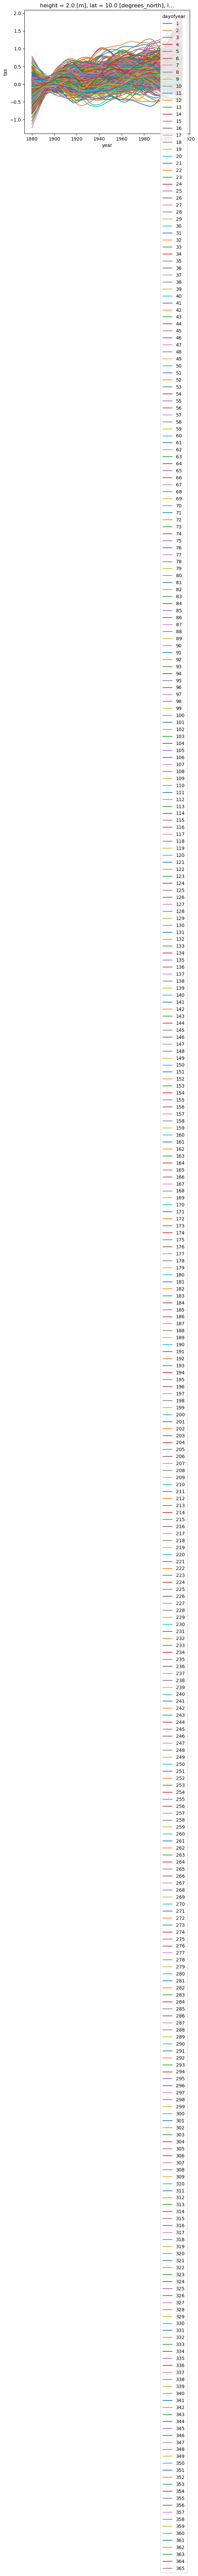

In [89]:
doy_sn_ds.plot(hue='dayofyear');

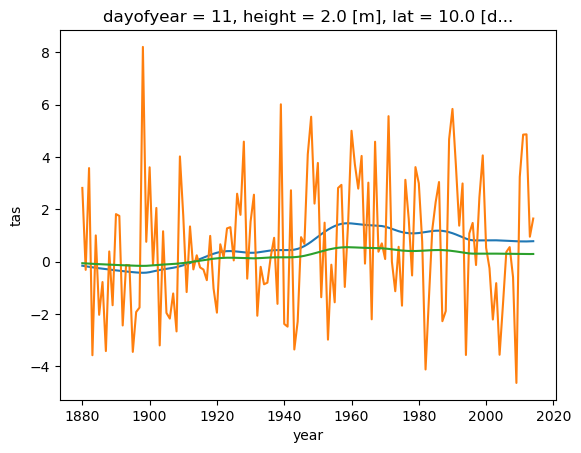

In [83]:
doy_fitted_ds.isel(dayofyear=10).plot(hue='dayofyear');
doy_anom_ds.isel(dayofyear=10).plot(hue='dayofyear');
doy_sn_ds.isel(dayofyear=10).plot(hue='dayofyear');

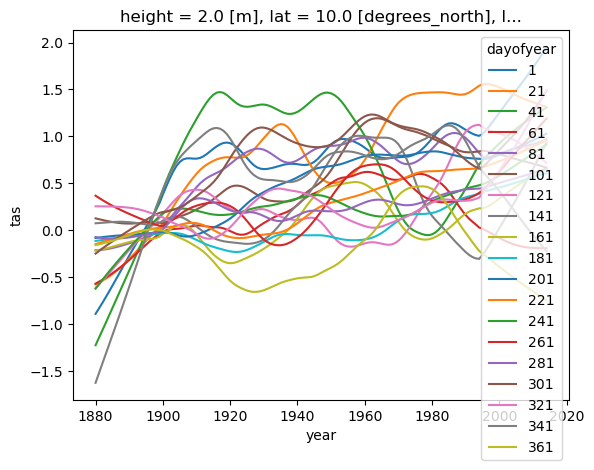

In [74]:
doy_fitted_ds.isel(dayofyear=slice(None, None, 20)).plot(hue='dayofyear');

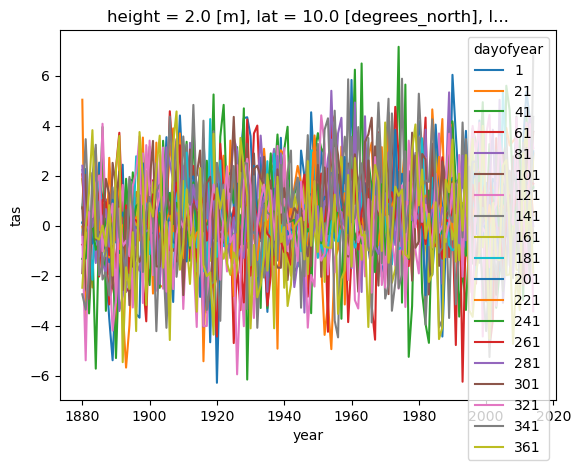

In [70]:
doy_anom_ds.isel(dayofyear=slice(None, None, 20)).plot(hue='dayofyear');

In [54]:
calculate_fitted_dayofyear_delayed = delayed(calculate_lowess_dayofyear)

# Step 1: Wrap the function calls in delayed
delayed_tasks = [calculate_fitted_dayofyear_delayed(arr, i) for i in range(1, 366)]

# Step 2: Trigger computation in parallel
dayofyear_list = compute(*delayed_tasks)

In [55]:
# dayofyear_list = []
# for i in range(5):
#     to = calculate_rolling_dayofyear(test_arr, i+1)
#     dayofyear_list.append(to)

In [56]:
dayofyear_fitted_ds = xr.concat(dayofyear_list, dim='dayofyear')

In [57]:
doy_anom_ds = dayofyear_fitted_ds - doy_climatology

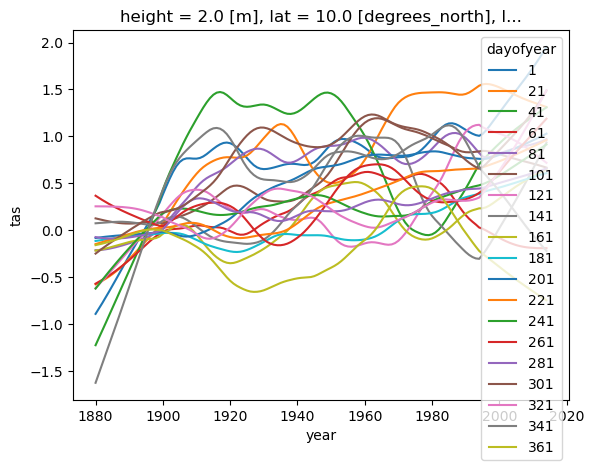

In [58]:
doy_anom_ds.isel(dayofyear=slice(None, None, 20)).plot(hue='dayofyear');

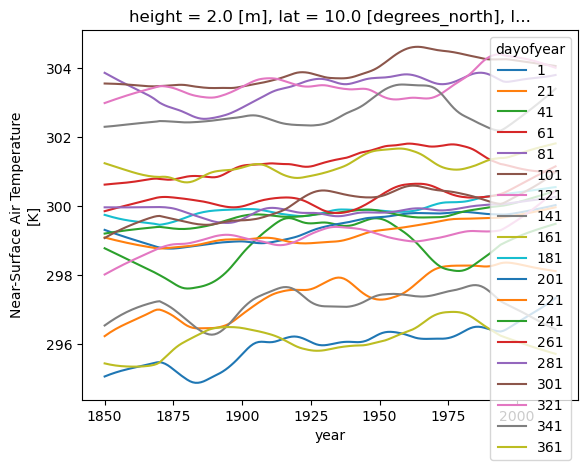

In [32]:
dayofyear_fitted_ds.isel(dayofyear=slice(None, None, 20)).plot(hue='dayofyear');

# BEST

BEST is not on a regular grid

In [10]:
daily_ds = xr.open_dataset(
    '/g/data/w40/ab2313/time_of_emergence/best/Complete_TAVG_Daily_EqualArea.nc')

In [4]:
daily_ds

<xarray.Dataset> Size: 1GB
Dimensions:      (map_points: 5498, time: 52077, day_number: 365)
Coordinates:
    longitude    (map_points) float32 22kB ...
    latitude     (map_points) float32 22kB ...
Dimensions without coordinates: map_points, time, day_number
Data variables:
    date_number  (time) float64 417kB ...
    year         (time) float64 417kB ...
    month        (time) float64 417kB ...
    day          (time) float64 417kB ...
    day_of_year  (time) float64 417kB ...
    land_mask    (map_points) float64 44kB ...
    temperature  (time, map_points) float32 1GB ...
    climatology  (day_number, map_points) float32 8MB ...
Attributes:
    Conventions:     Berkeley Earth Internal Convention (based on CF-1.5)
    title:           Native Format Berkeley Earth Surface Temperature Anomaly...
    history:         07-Sep-2022 00:28:01
    institution:     Berkeley Earth Surface Temperature Project
    source_history:  06-Sep-2022 15:50:29
    comment:         This file contains Berkeley Earth surface temperature an...

In [9]:
daily_ds.longitude.values[:30]

array([ -83.57143 ,  -70.71429 ,  -57.857143,  -45.      ,  -32.142857,
        -19.285715,  -90.      ,  -79.411766,  -68.82353 ,  -58.235294,
        -47.64706 ,  -37.058823,  -26.470589,  -15.882353,   47.64706 ,
         58.235294,   90.      ,  100.588234, -105.36585 ,  -96.585365,
        -87.80488 ,  -79.02439 ,  -70.243904,  -61.463413,  -52.682926,
        -43.90244 ,  -35.121952,  -26.341463,  -17.560976,    8.780488],
      dtype=float32)

In [ ]:
import xesmf as xe

# Create source dataset (point data)
source_ds = xr.Dataset(
    {
        "temperature": (["time", "map_points"], daily_ds['temperature'].values)
    },
    coords={
        "lon": (["map_points"], daily_ds['longitude'].values),
        "lat": (["map_points"], daily_ds['latitude'].values),
        "time": daily_ds['time'].values
    }
)

# Create target grid
target_grid = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-90, 90.1, 1.0)),
        "lon": (["lon"], np.arange(-180, 180.1, 1.0))
    }
)

# Regrid
regridder = xe.Regridder(source_ds, target_grid, "nearest_s2d", reuse_weights=False)
temp_on_grid = regridder(source_ds['temperature'])


--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: gadi-cpu-spr-0707
--------------------------------------------------------------------------
Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x14e17b95d510>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/_weakrefset.py", line 45, in _remove
    self.data.discard(item)
KeyboardInterrupt: 
2025-06-25 18:16:12,909 - distributed.nanny - ERROR - Worker process died unexpectedly
2025-06-25 18:16:12,909 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/g/data/h